In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
%matplotlib inline
from sklearn.metrics import confusion_matrix
matplotlib.style.use('ggplot')

In [2]:
data=pd.read_csv("train.csv")


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
y=data[["Survived"]]

In [88]:
data.shape,data2.shape

((891, 12), (418, 11))

In [7]:
data2=pd.read_csv("test.csv")

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## join Train and test data for data preproccessing

In [10]:
Data=pd.concat([data.drop(["Survived"],axis=1),data2], ignore_index=True)

## Handling missing data

In [11]:
Data.drop(["Name"],axis=1,inplace=True)


In [12]:
Data["Embarked"].replace(np.nan,'S',inplace=True)

In [13]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q


In [14]:
#drop colum cabin and Ticket because it has a lot of different data
Data.drop(["Cabin","Ticket"],axis=1,inplace=True)

In [15]:
Data["Fare"].replace(np.nan,33.3,inplace=True)

In [16]:
mean=Data["Age"].mean()
Data["Age"].replace(np.nan,mean,inplace=True)

In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
Embarked       1309 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


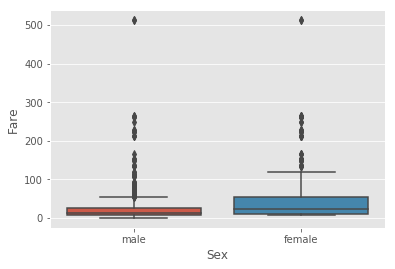

In [18]:
sns.boxplot(y="Fare",x="Sex",data=Data)

In [19]:
def child(X):
    if X<18:
        return "CHILD"
    elif X>50:
        return "OLD"
    else:
        return "ADULT"

In [20]:
Data["Agroup"]=Data.apply(lambda X: child(X["Age"]),axis=1)

In [21]:
X_all=pd.get_dummies(Data)

In [22]:
X_all.drop("PassengerId",axis=1,inplace=True)

In [23]:
X_all.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Agroup_ADULT,Agroup_CHILD,Agroup_OLD
0,3,22.0,1,0,7.2500,0,1,0,0,1,1,0,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,1,0,0


In [24]:
X_all["SibSp"].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

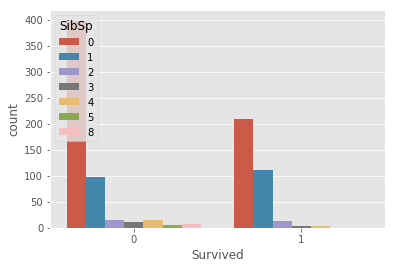

In [25]:
sns.countplot(data["Survived"],hue=data["SibSp"])

## split into train and test final data after preproccessing the data

In [26]:
X_TRAIN=X_all.iloc[:891, :]
X_TEST=X_all.iloc[891:, :]

In [27]:
X_TRAIN.shape,y.shape,X_TEST.shape

((891, 13), (891, 1), (418, 13))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_TRAIN, y, test_size=0.50)
X_crossValidation, X_test, y_crossValidation, y_test = train_test_split(X_test, y_test, test_size=0.30)

In [29]:
X_train.shape,X_crossValidation.shape,X_test.shape

((445, 13), (312, 13), (134, 13))

In [30]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Agroup_ADULT,Agroup_CHILD,Agroup_OLD
453,1,49.0,1,0,89.1042,0,1,1,0,0,1,0,0
654,3,18.0,0,0,6.7500,1,0,0,1,0,1,0,0
238,2,19.0,0,0,10.5000,0,1,0,0,1,1,0,0
676,3,24.5,0,0,8.0500,0,1,0,0,1,1,0,0
70,2,32.0,0,0,10.5000,0,1,0,0,1,1,0,0


# prediction

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [32]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [33]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [34]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [35]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [67]:
pred_scores = []
predY=pd.DataFrame({})
predfinal=pd.DataFrame({})
predtest=pd.DataFrame({})
for k,v in clfs.items():
    train_classifier(v, X_train, y_train)
    pred = predict_labels(v,X_crossValidation)
    predY[k]=pred
    predtest[k]=predict_labels(v,X_test)
    predfinal[k]=predict_labels(v,X_TEST)
    print(k,accuracy_score(y_crossValidation,pred))
    pred_scores.append((k, [accuracy_score(y_crossValidation,pred)]))

C:\Users\kaksh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\kaksh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.599358974359
KN 0.669871794872
NB 0.673076923077
DT 0.714743589744
LR 0.762820512821


C:\Users\kaksh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RF 0.75641025641


C:\Users\kaksh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost 0.733974358974
BgC 0.724358974359
ETC 0.75


C:\Users\kaksh\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [68]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

C:\Users\kaksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
SVC,0.599359
KN,0.669872
NB,0.673077
DT,0.714744
LR,0.762821
RF,0.756410
AdaBoost,0.733974
BgC,0.724359
ETC,0.750000


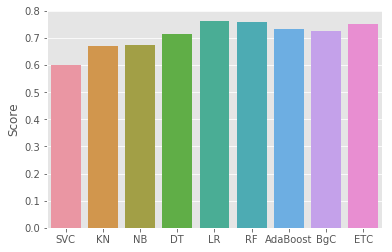

In [69]:
sns.barplot(x=df.index,y='Score',data=df)

In [70]:
predfinal.head()

,SVC,KN,NB,DT,LR,RF,AdaBoost,BgC,ETC
0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,1,0,1,1
4,0,0,0,0,1,0,0,0,0


In [71]:
predtest.head()

,SVC,KN,NB,DT,LR,RF,AdaBoost,BgC,ETC
0,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,1,1


In [72]:
predY.head()

,SVC,KN,NB,DT,LR,RF,AdaBoost,BgC,ETC
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [73]:
pred_scores = []
#predY=pd.DataFrame({})
for k,v in clfs.items():
    train_classifier(v, predY, y_crossValidation)
    pred = predict_labels(v,predtest)
    #predY[k]=pred
    print(k,accuracy_score(y_test,pred))
    pred_scores.append((k, [accuracy_score(y_test,pred)]))

C:\Users\kaksh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\kaksh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaksh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

SVC 0.567164179104
KN 0.84328358209
NB 0.649253731343
DT 0.835820895522
LR 0.850746268657
RF 0.835820895522


C:\Users\kaksh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost 0.84328358209
BgC 0.858208955224
ETC 0.828358208955


C:\Users\kaksh\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kaksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [74]:
df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
df

C:\Users\kaksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Score
SVC,0.567164
KN,0.843284
NB,0.649254
DT,0.835821
LR,0.850746
RF,0.835821
AdaBoost,0.843284
BgC,0.858209
ETC,0.828358


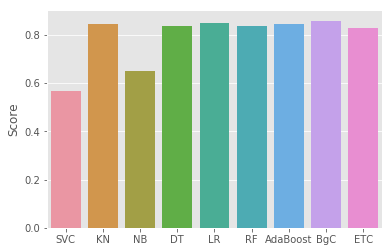

In [75]:
sns.barplot(x=df.index,y='Score',data=df)

In [79]:
accuracy_score(predict_labels(knc,predtest),y_test)

0.84328358208955223

In [80]:
pred=predict_labels(knc,predfinal)

In [81]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [82]:
data3=pd.read_csv('submission.csv')

In [83]:
data3.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [84]:
data3["Survived"]=pred

In [87]:
data3.to_csv("result.csv",index=False)

In [64]:
data4=pd.read_csv("Submission.csv")

In [66]:
data4.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
